In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
full = pd.read_csv('C:\\Users\\Curtis\\Desktop\\Springboard\\Capstone_Project1\\data\\Zip_Zhvi_AllHomes.csv')
del full['RegionID'], full['SizeRank'], full['Metro'], full['City']
full = full.fillna(0)

In [3]:
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
point_labels = {'Nantucket':'MA', 'New York':'NY', 'San Miguel':'CO', 'Dukes':'MA'}

In [4]:
grouped = full.groupby(['CountyName', 'State']).mean().transpose()
grouped = grouped.iloc[1:,:]
grouped.index = pd.to_datetime(grouped.index)
grouped_ba = grouped.loc[:,bayarea_counties]
grouped = grouped.drop(bayarea_counties, axis =1)
grouped_ba.columns = grouped_ba.columns.droplevel('State')

pct_change = pd.concat([grouped['2010-01'], grouped['2018-04']]).transpose()
pct_change['change'] = (pct_change.iloc[:,1] - pct_change.iloc[:,0])/(pct_change.iloc[:,0]) * 100
pct_change_ba = pd.concat([grouped_ba['2010-01'], grouped_ba['2018-04']]).transpose()
pct_change_ba['change'] = (pct_change_ba.iloc[:,1] - pct_change_ba.iloc[:,0])/(pct_change_ba.iloc[:,0]) * 100

In [5]:
df = pd.read_csv('C:\\Users\\Curtis\\Desktop\\Springboard\\Capstone_Project1\\data\\Zip_Zhvi_AllHomes.csv',
                 parse_dates = True)
df = df.fillna(0)
df = df.set_index('RegionName')
full = df.drop(['RegionID', 'SizeRank', 'Metro', 'City'], axis = 1)

In [6]:
# Create data frame of Bay Area zip codes
bay_area = full[(full['CountyName'].isin(bayarea_counties)) & (full['State'] == 'CA')]

In [7]:
ba = bay_area.loc[:,'2010-01':'2018-04']

In [8]:
# Create data frame of non-Bay Area zip codes
united_states = full[~((full['CountyName'].isin(bayarea_counties)) & (full['State'] == 'CA'))]
us = united_states.loc[:,'2010-01':'2018-04']

In [9]:
# Create new data frames with 2010 and 2018 data
ba_pc = pd.concat([ba['2010-01'], ba['2018-04']], axis = 1)
us_pc = pd.concat([us['2010-01'], us['2018-04']], axis = 1)

# Add percent change column to each new data frame
ba_pc['change'] = (ba['2018-04'] - ba['2010-01'])/ba['2010-01']
us_pc['change'] = (us['2018-04'] - us['2010-01'])/us['2010-01']

# Remove data with 'inf' change
ba_pc = ba_pc[ba_pc['change'] != float('inf')]
us_pc = us_pc[us_pc['change'] != float('inf')]

In [10]:
# Create dataframe with Bay Area county names and percent change from 2010-01 to 2018-04
ba_pc_county = pd.concat([bay_area['CountyName'], ba_pc], axis = 1, join = 'inner')
ba_pc_county = ba_pc_county.loc[:, ['CountyName', 'change']]

# Bay Area Housing Market

Curtis Higa

## Question:

How does the Bay Area housing market compare to the rest of the United States?

- Since 2010, housing in the Bay Area has risen dramatically
    - Big tech region
    - High turnover rates
    - Political action considered

- Data sampled by zip codes

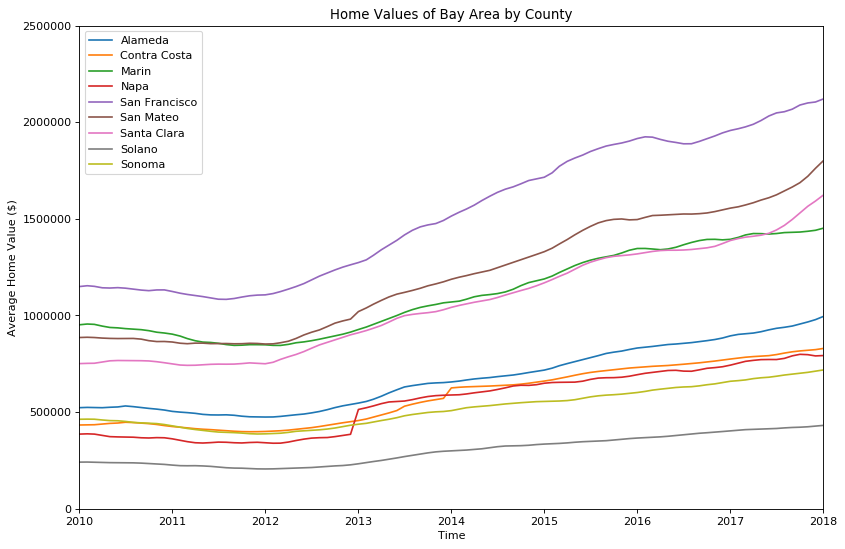

In [11]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

for county in bayarea_counties:
    plt.plot(grouped_ba[county], label = county)
plt.legend()
plt.title('Home Values of Bay Area by County')
plt.xlabel('Time')
plt.ylabel('Average Home Value ($)')
plt.axis(['2010','2018',0,2500000])
plt.show()

## 2018 Bay Area Housing Prices vs. United States

Below shows how Bay Area counties (red) compare to other U.S. counties

- All Bay Area counties above average
- 5 of top 10 counties are Bay Area counties

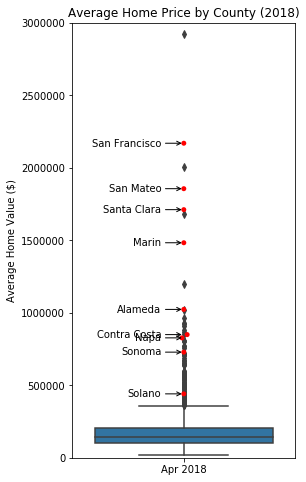

In [18]:
plt.figure(figsize=(4, 8))
_ = sns.boxplot(data = grouped.loc['2018-04',:].transpose())
_ = sns.swarmplot(data = grouped_ba.loc['2018-04',:].transpose(), color = 'red')
_ = plt.title('Average Home Price by County (2018)')
_ = plt.xticks(range(1), ['Apr 2018'])
_ = plt.ylabel('Average Home Value ($)')
_ = plt.ylim([0, 3000000])
for label in bayarea_counties:
    _ = plt.annotate(label,
                    xy = (0, grouped_ba['2018-04'][label]),
                    xytext = (-0.1, grouped_ba['2018-04'][label]),
                    textcoords = 'data', ha = 'right', va = 'center',
                    arrowprops=dict(arrowstyle = '->'))

### 2018 Bay Area Housing Prices vs. United States: Significance

- Difference in mean housing price
    - Bay Area mean: \$1,301,955
    - United States mean: \$267,971

- Statistically and practically significant:
    - Bay Area prices are nearly five times as much as the national average by zip code.

## 2010-2018 Bay Area Housing Price Percent Change vs. United States

- Want to compare how counties have grown since end of Great Recession in 2010
    - Bay Area counties marked in red

- Percent change calculated:
    - $percent\_change = \frac{(April\_2018\_data) - (January\_2010\_data)}{(January\_2010\_data)}$

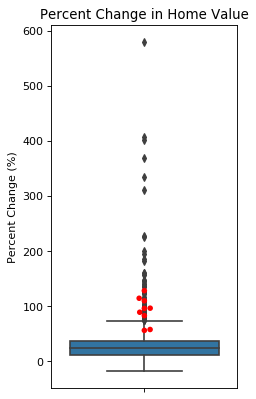

In [13]:
plt.figure(figsize=(3, 6), dpi= 80, facecolor='w', edgecolor='k')

_ = sns.boxplot(pct_change[pct_change['change'] < 600]['change'], orient = 'v')
_ = sns.swarmplot(pct_change_ba['change'],
                  orient = 'v', color = 'red')
_ = plt.title('Percent Change in Home Value')
_ = plt.ylabel('Percent Change (%)')

### 2010-2018 Bay Area Housing Price Percent Change vs. United States: Significance
- Difference in mean percent change
    - Bay Area mean percent change: 95.2%
    - United States mean percent change: 28.8%
- Statistically and practically significant
    - Bay Area prices have nearly doubled on average
    - United States prices on average have hardly grown

## 2018 Bay Area Housing Prices by County
- Saw a gap in prices between cluster of counties
    - "Upper" tier counties
        - Marin
        - San Francisco
        - San Mateo
        - Santa Clara
    - "Lower" tier counties
        - Alameda
        - Contra Costa
        - Napa
        - Solano
        - Sonoma

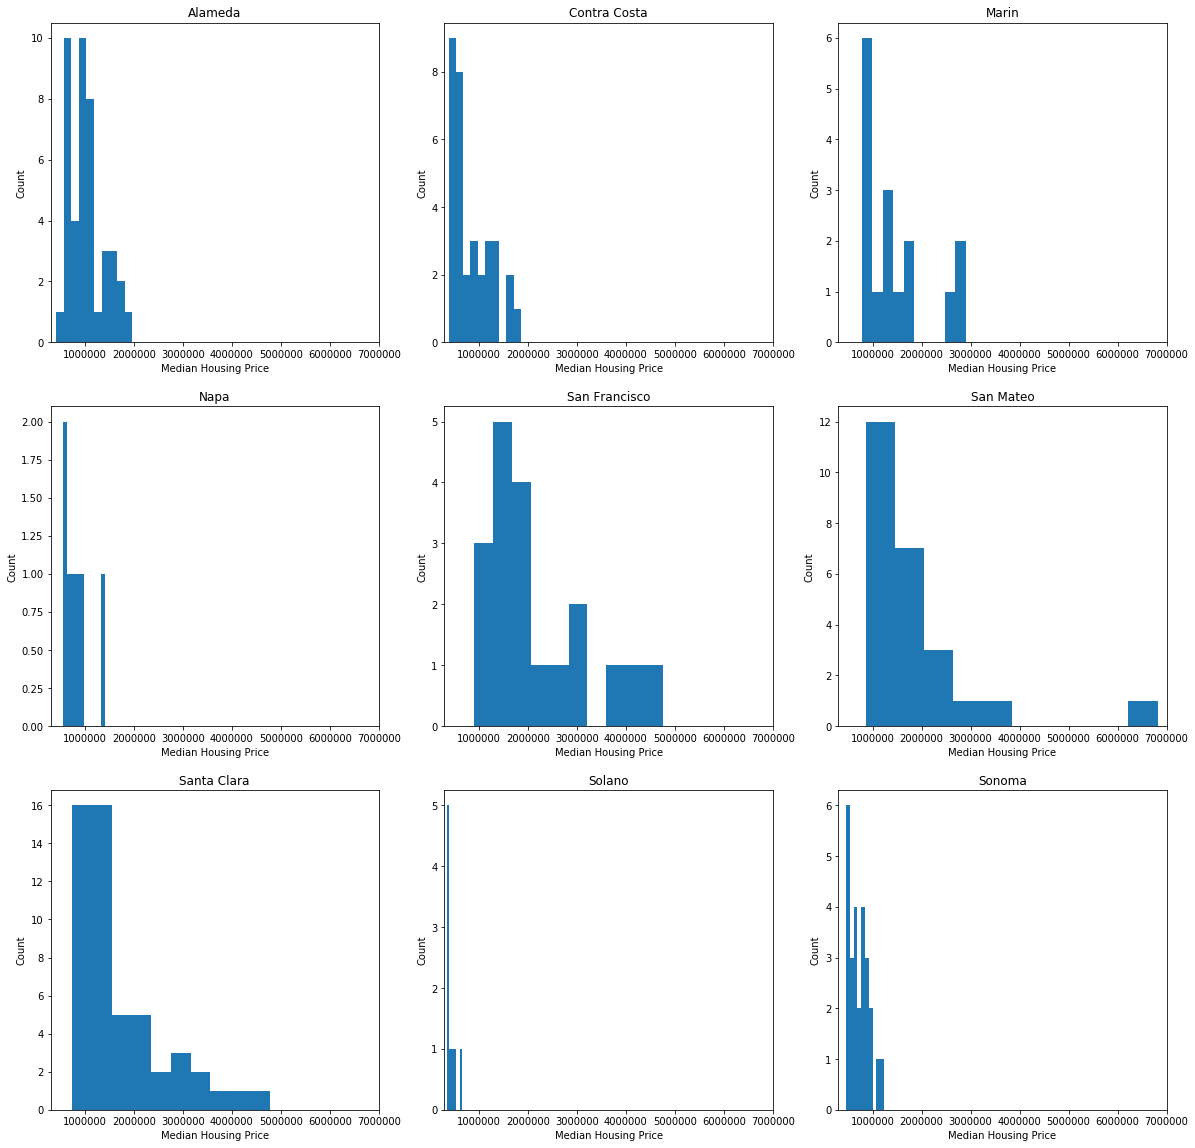

In [14]:
# Plot distribution of median house prices by zip code by Bay Area county
plt.subplots(figsize = (20, 20))
for county in bayarea_counties:
    _ = plt.subplot(3, 3, bayarea_counties.index(county) + 1)
    _ = plt.hist(bay_area[bay_area['CountyName'] == county]['2018-04'])
    _ = plt.title(county)
    _ = plt.xlabel('Median Housing Price')
    _ = plt.ylabel('Count')
    _ = plt.xlim([300000,7000000])

### 2018 Bay Area Housing Prices by County: Significance
- There's seems to be gaps in house prices by county
    - "Upper" tier counties have higher house prices on average than the rest of Bay Area
        - Mainly reside on western side of the Bay Area
        - Big tech/business companies are headquartered
    - "Lower" tier county house prices (minus Solano county) are clustered under "upper" tier
    - Solano county has cheaper houses on average
        - Furthest away (not adjacent) from "upper" tier counties
- Statistically and practically significant
    - "Upper" tier county average almost twice "lower" tier county average

## 2010-2018 Bay Area Housing Price Percent Change by County
Compare how each countys' prices have changed since 2010
- Indication on their growth and relevance

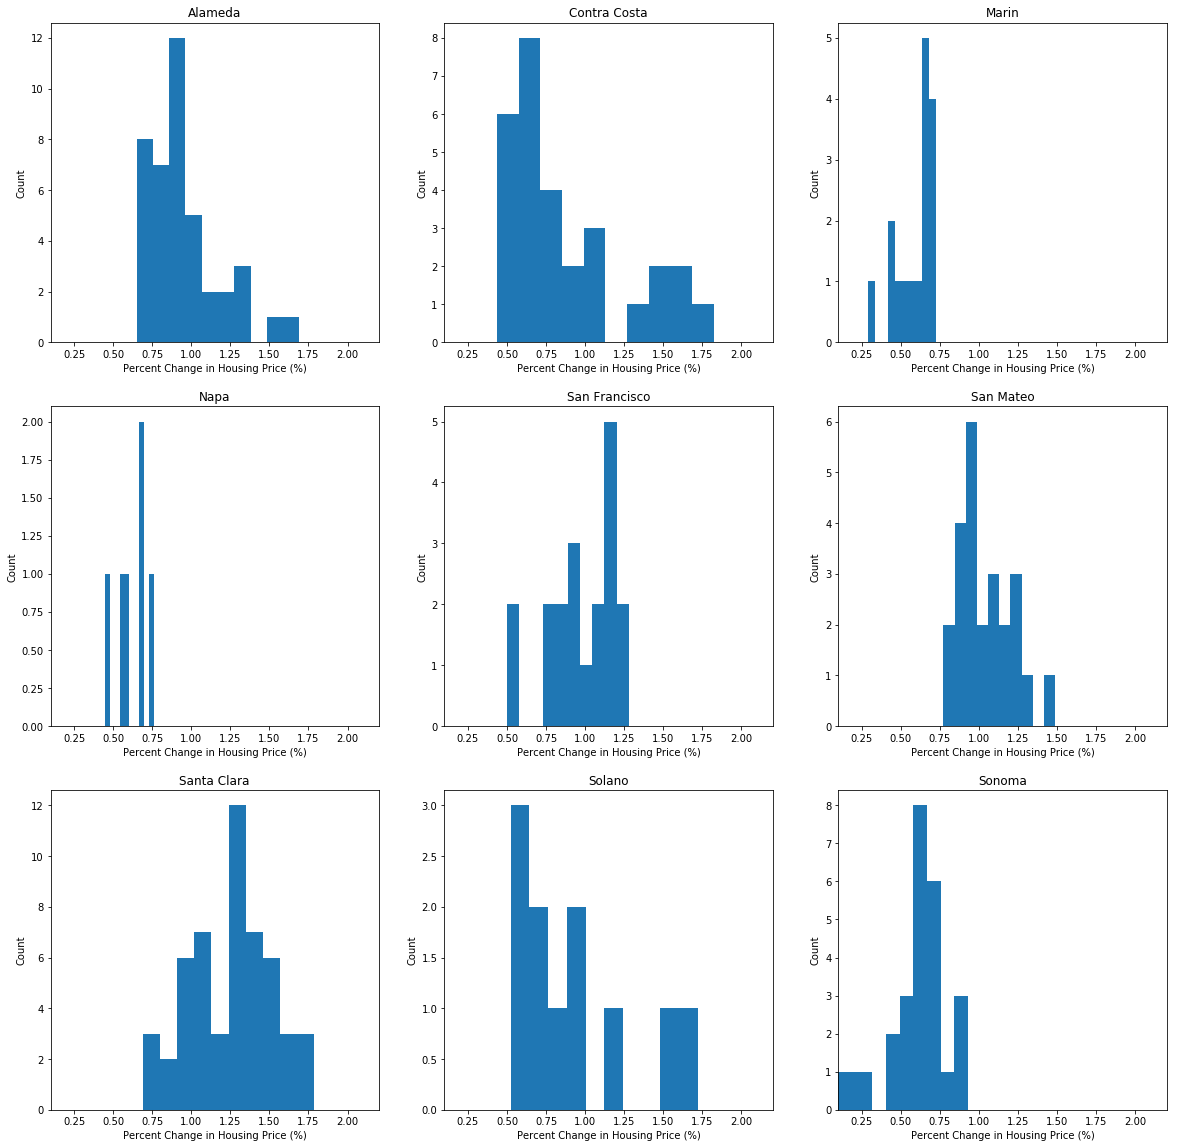

In [15]:
# Plot the distribution of percent change per county by zip code
plt.subplots(figsize = (20, 20))
for county in bayarea_counties:
    _ = plt.subplot(3, 3, bayarea_counties.index(county) + 1)
    _ = plt.hist(ba_pc_county[ba_pc_county['CountyName'] == county]['change'])
    _ = plt.title(county)
    _ = plt.xlabel('Percent Change in Housing Price (%)')
    _ = plt.ylabel('Count')
    _ = plt.xlim([0.1, 2.2])

### 2010-2018 Bay Area Housing Price Percent Change by County: Significance
- Significant gaps appear
    - 3 North Bay counties (Marin, Napa, and Sonoma) are clustered together with the smallest percent change
        - All hover aroung 60% change
    - 5 counties (Alameda, Contra Costa, San Francisco, San Mateo, and Solano) clustered in the middle
        - Range from 89% to 104% change
    - Santa Clara county seen the biggest significant change
         - Saw 126% change since 2010
 
- Practical Significance
    - Santa Clara is grew/growing twice as fast as the 3 North Bay counties
    - All Bay Area counties grew faster than the national average